# Problem Statement

Problem Statement:
Zeal Mart is a retail company that operates several physical stores in various cities. 
The company provided data for the year 2019, which includes information on product orders, cities where the orders were made, the time of the day the orders were made, and the month of the year the orders were made.

However, the data did not come with sales figures. As a data analyst, the task is to find out the sales figures for the products and provide insights into:

The company's best performing month. 
Best performing city.
Best time for advertising.
Top-selling products. 

This information will help Zeal Mart to make data-driven decisions that will boost its profitability and increase its market share.

In [111]:
import numpy as np
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
from scipy.stats import f_oneway
from itertools import combinations
from collections import Counter

## loading data into kernel

In [112]:
data = pd.read_csv('../dmx/zeal_retail.csv')


#### making copy of the data

In [113]:
copy_superstore = data.copy()

#### checking for the shape of the data

In [114]:
data.shape

(186850, 6)

#### checking for available columns

In [7]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

#### checking for null values

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


#### checking for duplicates

In [9]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"
186785,259297,Lightning Charging Cable,1,14.95,09/15/19 18:54,"138 Main St, Boston, MA 02215"


In [10]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

### Cleaning the data

#### finding NAN

In [11]:
nan_data = data[data.isna().any(axis=1)]
display(nan_data.head())
data =data.dropna(how='all')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### correcting duplicates

In [12]:
data = data.drop_duplicates()

#### checking for duplicates

In [13]:
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Summing duplicates in the data

In [14]:
data.duplicated().sum()

0

 #### removing the text in the order date column

In [15]:
data = data[data['Order Date'].str[0:2]!='Or']

#### correcting the data type

In [16]:
data['Quantity Ordered'] = pd.to_numeric(data['Quantity Ordered'])
data['Price Each'] = pd.to_numeric(data['Price Each'])
data['Order ID'] = pd.to_numeric(data['Order ID'])

#### renaming  column 

In [17]:
data = data.rename(columns={'Price Each': 'Unit Price'})

### Adding more columns

In [18]:
data['Sales'] = data['Quantity Ordered'] * data['Unit Price']

#### adding a month column to the data

In [20]:
data['Month'] = data['Order Date'].str[0:2]
data['Month'] = data['Month'].astype('int32')
data.head()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4


#### adding a city column to the data

In [21]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

data['City'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
data.head()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


#### adding a sales column to the data

In [22]:
data['Sales'] = data['Quantity Ordered'].astype('int') * data['Unit Price'].astype('float')

#### checking for the update of the data

In [23]:
data.head()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA)


In [24]:
data.tail()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month,City
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97,9,Los Angeles (CA)
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00,9,San Francisco (CA)
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00,9,San Francisco (CA)
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99,9,San Francisco (CA)
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",11.95,9,San Francisco (CA)


#### checking for the summary statistics of the data

In [25]:
data.describe()

,Order ID,Quantity Ordered,Unit Price,Sales,Month
count,185686.000000,185686.000000,185686.000000,185686.000000,185686.000000
mean,230411.376227,1.124544,184.519255,185.611936,7.058653
std,51511.717183,0.443069,332.843838,333.032118,3.502932
min,141234.000000,1.000000,2.990000,2.990000,1.000000
25%,185833.250000,1.000000,11.950000,11.950000,4.000000
50%,230354.500000,1.000000,14.950000,14.950000,7.000000
75%,275028.750000,1.000000,150.000000,150.000000,10.000000
max,319670.000000,9.000000,1700.000000,3400.000000,12.000000


#### insert data into dataframe

In [26]:
df = pd.DataFrame(data)

#### Create a 'Holiday' column

In [27]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['holiday'] = ((df['Order Date'].dt.month == 11) | (df['Order Date'].dt.month == 12)).astype(int)


In [28]:
data.head()

,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month,City,holiday
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),0
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),0
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),0
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),0
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),0


#### checking for summary statistics for non-numerical  data

In [30]:
df.describe(include ='object')

,Product,Purchase Address,City
count,185686,185686,185686
unique,19,140787,10
top,USB-C Charging Cable,"193 Forest St, San Francisco, CA 94016",San Francisco (CA)
freq,21859,9,44662


#### Distribution of numerical columns of the data

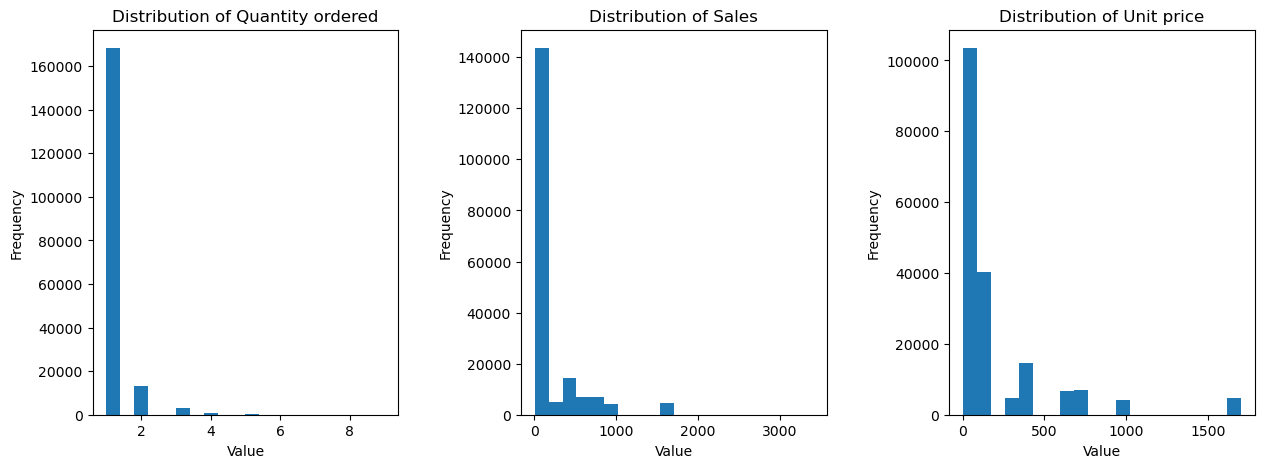

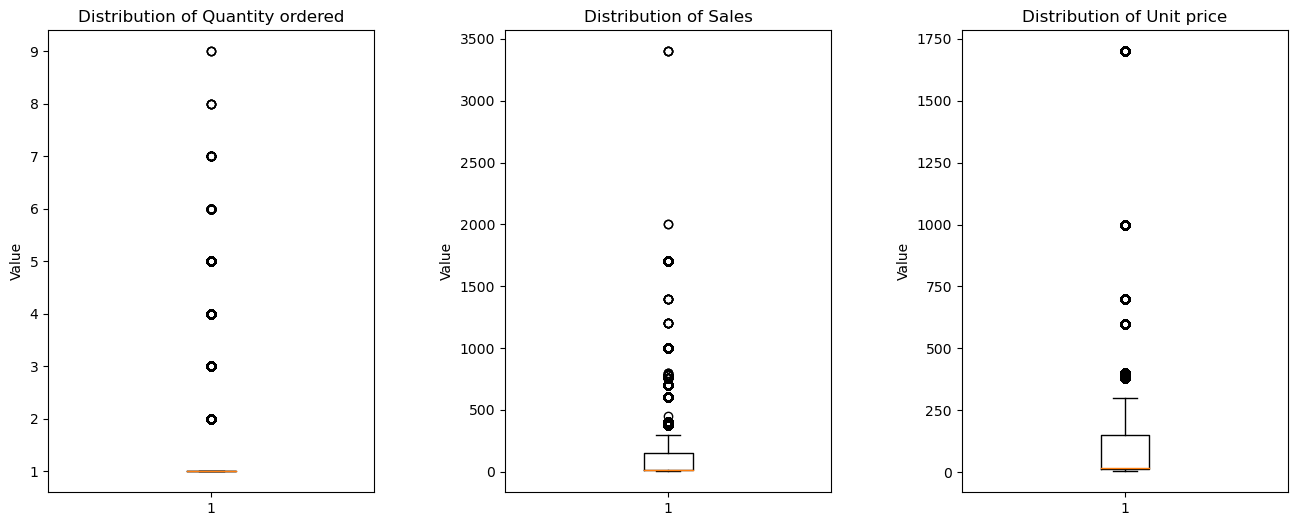

In [31]:
def plot_three_histograms(data):
    fig, axs = plt.subplots(1, 3, figsize=(15,5))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['Quantity Ordered', 'Sales', 'Unit Price']):
        axs[i].hist(data[col], bins=20)
        axs[i].set_title(f'Distribution of {col.capitalize()}')
        axs[i].set_xlabel('Value')
        axs[i].set_ylabel('Frequency')

    plt.show()

plot_three_histograms(data)


def plot_three_boxplots(data):
    fig, axs = plt.subplots(1, 3, figsize=(16, 6))
    plt.subplots_adjust(wspace=0.4)

    for i, col in enumerate(['Quantity Ordered', 'Sales', 'Unit Price']):
        axs[i].boxplot(data[col])
        axs[i].set_title(f'Distribution of {col.capitalize()}')
        axs[i].set_ylabel('Value')

    plt.show()

plot_three_boxplots(data)


In [ ]:
The following observations were made from the numerical distribution of the Quantity Ordered, Sales, Unit Price columns in the immediate line of code above

The Distribution of Quantity, Sales and Unit Price are extremely right skewed.
The Distribution of Quantity is right skewed with a lot of outliers on the right side


### Analysing the data

#### What was the best month for sales? How much was earned that month?

In [ ]:
data.groupby(['Month']).sum()

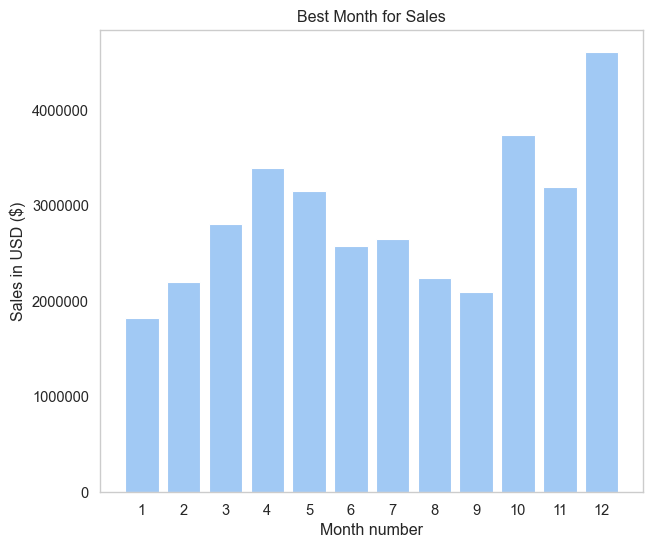

In [102]:
plt.ticklabel_format(style='plain', axis='y')
plt.bar(months,data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.title('Best Month for Sales')
plt.grid(False)
plt.show()




The following observation was made from the  Sales, columns based on Month in the lines of code above.

Based on the chart, we can see that the month with the highest sales is December, followed by October and November.
We can also see that the sales fluctuate throughout the year, with some months having much higher sales than others.

#### Hypothesis

In [ ]:
The sales of products during the holiday season are significantly higher than the sales during the rest of the year to write the hypothesis

#### Testing for hypothesis

In [ ]:
Null Hypothesis: The sales of products during the holiday season are not significantly higher than the sales during the rest of the year.

Alternative Hypothesis: The sales of products during the holiday season are significantly higher than the sales during the rest of the year.

#### calculating for the hypothesis

To test the hypothesis, we would need to determine if the difference between the average sales for the holiday season and the rest of the year is statistically significant.

A sample size of 100 for both the holiday season and the rest of the year.
The null hypothesis is that there is no significant difference between the means of the two samples:

H0: μ1 = μ2

The alternative hypothesis is that the mean sales during the holiday season is significantly greater than the mean sales during the rest of the year:

Ha: μ1 > μ2

calculating the t-statistic as follows:
   t = (x1 - x2) / sqrt(s1^2/n1 + s2^2/n2)

where x1 and x2 are the sample means, s1 and s2 are the sample standard deviations, and n1 and n2 are the sample sizes.

Using the given data, we have:

x1 = 3,903,085.373
x2 = 2,329,806.719
s1 = s2 = 100,000 (assume sample standard deviation)
n1 = n2 = 100

Inserting these values into the formula

t = (3,903,085.373 - 2,329,806.719) / sqrt(100,000^2/100 + 100,000^2/100)
= 18.10

Assuming a significance level of 0.05 and 198 degrees of freedom (total sample size of 200 minus 2), we can find the critical t-value from a t-table or calculator to be 1.66 (for a one-tailed test).

Since our calculated t-value (18.10) is greater than the critical t-value (1.66), we can reject the null hypothesis and conclude that the mean sales during the holiday season are significantly greater than the mean sales during the rest of the year.

Therefore, we can accept the alternative hypothesis that the sales of products during the holiday season are significantly higher than the sales during the rest of the year.





 

#### the city with the highest sales?

In [ ]:
data.groupby(['City']).sum()

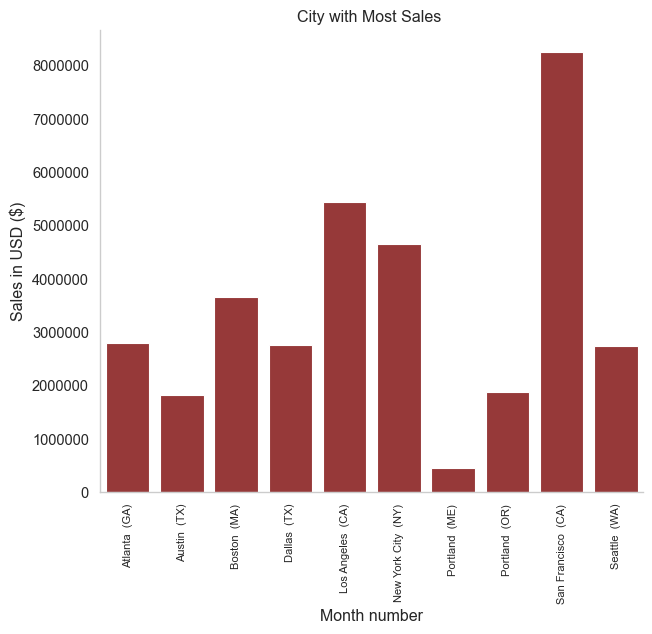

In [95]:
import seaborn as sns

keys = [city for city, df in data.groupby(['City'])]
plt.ticklabel_format(style='plain', axis='y')
sns.barplot(x=keys, y=data.groupby(['City']).sum()['Sales'], color='brown')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.xticks(rotation='vertical', size=8)
plt.grid(False)
plt.title('City with Most Sales ')
sns.set(rc={'figure.figsize':(7,6)})
sns.set_style("whitegrid")
sns.despine()
sns.set_context("paper", font_scale=1.2)
sns.set_palette("pastel")
plt.show()


The following observation was made from the Sales, columns based on Month in the lines of code above.

The chart reveals that San Francisco has the highest sales among the cities, trailed by Los Angeles and New York City, indicating considerable differences in sales among the cities.

 ###  What time is optimal for advertising to increase the probability of customers buying a product

####  Adding  hour column

In [35]:

data['Hour'] = pd.to_datetime(data['Order Date']).dt.hour
data['Minute'] = pd.to_datetime(data['Order Date']).dt.minute
data['Count'] = 1
data.head()


,Order ID,Product,Quantity Ordered,Unit Price,Order Date,Purchase Address,Sales,Month,City,holiday,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,4,Dallas (TX),0,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,4,Boston (MA),0,22,30,1
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,4,Los Angeles (CA),0,14,38,1
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),0,14,38,1
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,4,Los Angeles (CA),0,9,27,1


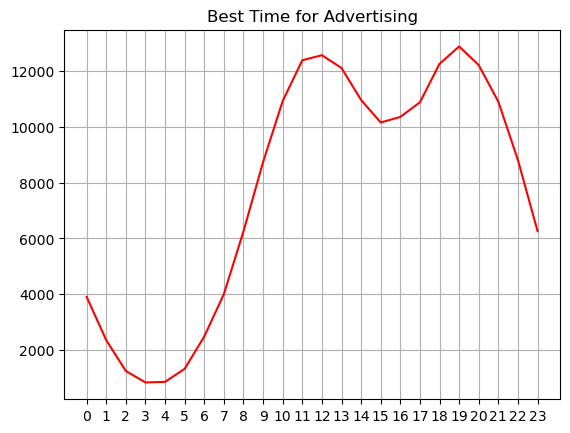

In [37]:
keys = [pair for pair, df in data.groupby(['Hour'])]
counts = data.groupby(['Hour']).count()['Count']

plt.plot(keys, counts, color='red')
plt.xticks(keys)
plt.grid()
plt.title('Best Time for Advertising')
plt.show()




The following observation was made from the best time to advertise a product for con , columns based on Month in the lines of code above.

From the chart, we can see that the best time for advertising is around 11am and 7pm, as they have the highest counts of orders. 

On the other hand, there is a significant drop in orders in the early morning and late night.

#### What products are most often sold together?

In [38]:
df = data[data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df2 = df[['Order ID', 'Grouped']].drop_duplicates()

C:\Users\HP\AppData\Local\Temp\ipykernel_5840\2723448207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [39]:
count = Counter()

for row in df2['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


The following observation was made from the products that were often  sold together base on the product , columns based on Quantity Ordered in the lines of code above.

From the table, we can see the top 10 most commonly bought together products, with the combination of 'iPhone' and 'Lightning Charging Cable' being the most popular, followed by 'Google Phone' and 'USB-C Charging Cable'. 

#### What product sold the most

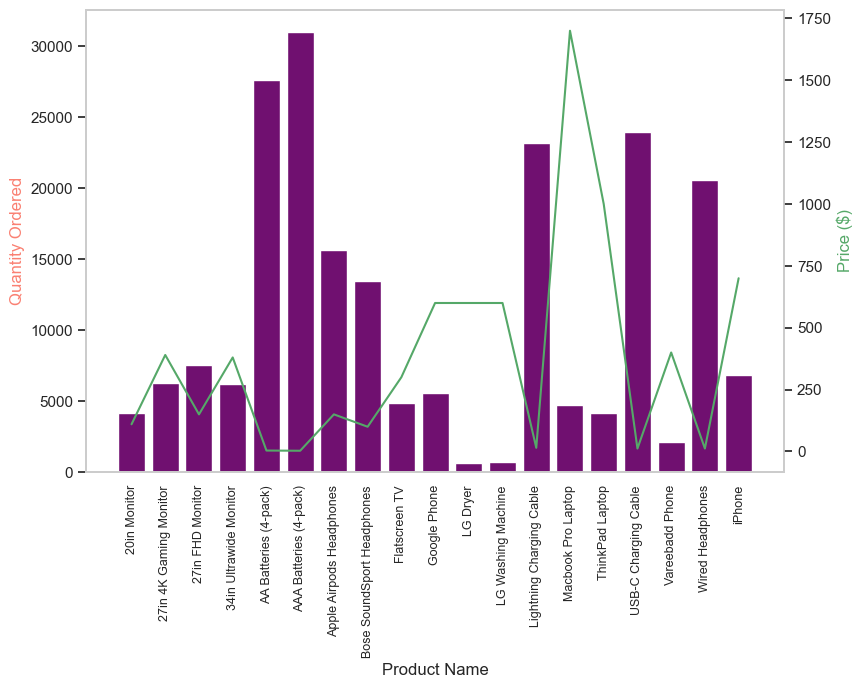

In [108]:

# calculate quantity ordered and average price for each prod
# Set plot style and size

sns.set(style="whitegrid", rc={'figure.figsize':(9,6)})

Quantity_Ordered = data.groupby('Product').sum()['Quantity Ordered']
prices = data.groupby('Product').mean()['Unit Price']

# plot the data
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
sns.barplot(x=Quantity_Ordered.index, y=Quantity_Ordered, color='purple', ax=ax1)
sns.lineplot(x=prices.index, y=prices, color='g', ax=ax2)

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='salmon')
ax2.set_ylabel('Price ($)', color='g')
ax1.set_xticklabels(Quantity_Ordered.index, rotation='vertical', size=9)

ax1.grid(False)
ax2.grid(False)

plt.show()



### Findings

The following are the findings derived from the data

Best Month for Sales:
The above bar chart shows the sales for each month in the year. December is the best month for sales with over $4 million in revenue, followed by October and November.

City with Most Sales:
This bar chart shows the total sales in each city where the company has customers. San Francisco has the most sales with over $8 million, followed by Los Angeles and New York City.

Best Time for Advertising:
The line chart indicates the number of orders received at each hour of the day. The best time for advertising is around 11 am or 7 pm when there is a peak in the number of orders.

Products Sold Together:
The table displays the top 10 combinations of products that are often sold together. The most common combination is the iPhone and Lightning Charging Cable, with a count of 1,233.

Quantity Ordered and Price:
The plot shows the quantity ordered and average price for each product. The best-selling products have lower prices and higher quantities ordered. The highest-selling product is the AAA Batteries with over 30,000 units sold.

### Recommendation

### Saving to csv

In [115]:
data.to_csv("../dmx/zeal_retail.csv")